<img src='https://training.dwit.edu.np/frontend/images/computer-training-institute.png'>
<h1>Data Science and Machine learning in Python</h1>
<h3>Instructor: <a href='https://www.kaggle.com/atishadhikari'> Atish Adhikari</a></h3>
<hr>

### Generative Adversial Network (GAN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPool2D, GlobalAvgPool2D


In [3]:
from tqdm import tqdm

In [4]:
(X_train, _), (_ , _ ) = mnist.load_data()

In [5]:
X_train = X_train.reshape(60000, 28*28) / 255

In [6]:
noise_dim = 100

In [7]:
generator = Sequential()
generator.add(Dense(input_dim=noise_dim, units=128, activation='relu'))
generator.add(BatchNormalization())

generator.add(Dense(units=256, activation='relu'))
generator.add(BatchNormalization())

generator.add(Dense(units=512, activation='relu'))
generator.add(BatchNormalization())

generator.add(Dense(units=784, activation='sigmoid'))

generator.compile(loss="binary_crossentropy", optimizer="adam")

In [8]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               4

In [9]:
discriminator = Sequential()

discriminator.add(Dense(input_dim=784, units=256, activation='relu'))
discriminator.add(Dense(units=64, activation='relu'))
discriminator.add(Dense(units=24, activation='relu'))
discriminator.add(Dense(units=1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 218,993
Trainable params: 218,993
Non-trainable params: 0
_________________________________________________________________


In [11]:
discriminator.trainable = False
gan_input = generator.input
upper_half = generator (gan_input)
layer_all = discriminator (upper_half)
gan = Model(gan_input, layer_all)

gan.compile(loss="binary_crossentropy", optimizer="adam")

In [12]:
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_input (InputLayer)     [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               583312    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 218993    
Total params: 802,305
Trainable params: 581,520
Non-trainable params: 220,785
_________________________________________________________________


In [13]:
X_train.shape[0]

60000

In [14]:
def plot_generated(n_ex=10, dim=(1, 10), figsize=(12, 2), noise_dim=100):
    noise = np.random.normal(0, 1, size=(n_ex, noise_dim))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(n_ex, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [15]:
def fit(X_train, epochs, batch_size=32, plot_int=5):
    
    no_of_batches = X_train.shape[0] // batch_size
    
    for i in tqdm(range(1, epochs+1)):
        print(f"Eopch: {i}")
        
        for j in range(no_of_batches):
            #create Noise of batch size -> 32x100
            noise = np.random.normal(0,1, size=(batch_size, noise_dim))
            #generate fake image form noise -> 32x784
            fake_images = generator.predict(noise)

            real_images = X_train[np.random.randint(0, X_train.shape[0]-1, size=batch_size)]
            
            #make training set and corresponding label
            training_set = np.concatenate((real_images, fake_images))
            training_labels = np.zeros(2 * batch_size)
            training_labels[:batch_size] = 0.9
                        
            discriminator.trainable = True
            discriminator.train_on_batch(training_set, training_labels)
            
            noise_gen = np.random.normal(0,1, size=(batch_size, noise_dim))
            y_real = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise_gen, y_real)
            
        if i==1 or i%plot_int == 0:
            plot_generated()
            

  0%|          | 0/20 [00:00<?, ?it/s]

Eopch: 1


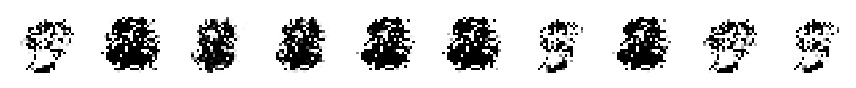

  5%|▌         | 1/20 [01:20<25:23, 80.18s/it]

Eopch: 2


 10%|█         | 2/20 [02:37<23:49, 79.39s/it]

Eopch: 3


 15%|█▌        | 3/20 [03:55<22:20, 78.83s/it]

Eopch: 4


 20%|██        | 4/20 [05:13<21:00, 78.76s/it]

Eopch: 5


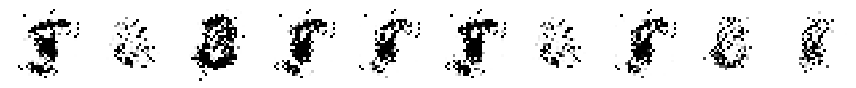

 25%|██▌       | 5/20 [06:34<19:50, 79.38s/it]

Eopch: 6


 30%|███       | 6/20 [07:54<18:33, 79.51s/it]

Eopch: 7


 35%|███▌      | 7/20 [09:14<17:14, 79.61s/it]

Eopch: 8


 40%|████      | 8/20 [10:34<15:58, 79.89s/it]

Eopch: 9


 45%|████▌     | 9/20 [11:56<14:43, 80.33s/it]

Eopch: 10


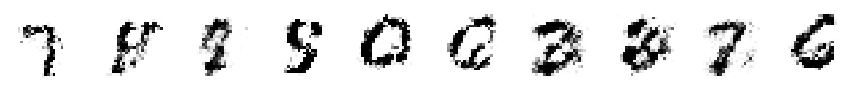

 50%|█████     | 10/20 [13:17<13:24, 80.49s/it]

Eopch: 11


 55%|█████▌    | 11/20 [14:36<12:00, 80.09s/it]

Eopch: 12


 60%|██████    | 12/20 [15:56<10:40, 80.01s/it]

Eopch: 13


 65%|██████▌   | 13/20 [17:16<09:20, 80.12s/it]

Eopch: 14


 70%|███████   | 14/20 [18:36<08:00, 80.04s/it]

Eopch: 15


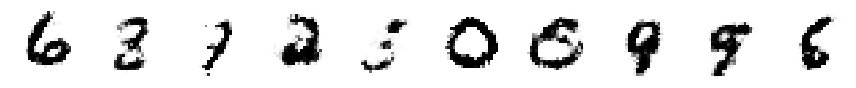

 75%|███████▌  | 15/20 [19:56<06:40, 80.00s/it]

Eopch: 16


 80%|████████  | 16/20 [21:14<05:18, 79.62s/it]

Eopch: 17


 85%|████████▌ | 17/20 [22:34<03:58, 79.58s/it]

Eopch: 18


 90%|█████████ | 18/20 [23:53<02:39, 79.54s/it]

Eopch: 19


 95%|█████████▌| 19/20 [25:13<01:19, 79.45s/it]

Eopch: 20


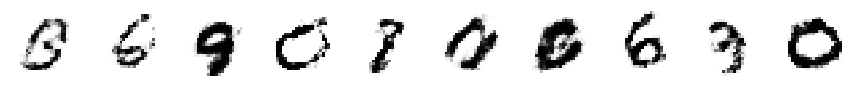

100%|██████████| 20/20 [26:33<00:00, 79.66s/it]


In [16]:
fit(X_train, epochs=20)

In [22]:
from tensorflow.keras.layers import Reshape, Conv2DTranspose, Conv2D, Flatten, GlobalAvgPool2D, MaxPool2D, Input

In [17]:
(X, _), (_, _) = mnist.load_data()
X = X.reshape(60000, 28,28,1) / 255

In [19]:
generator = Sequential()
generator.add(Dense(7*7*112, input_dim=noise_dim, activation='relu'))
generator.add(Reshape((7, 7, 112)))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(filters=64, kernel_size=(4,4), strides=2, padding='same', activation='relu'))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(filters=1, kernel_size=(4,4), strides=2, padding='same', activation='sigmoid'))
generator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
generator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5488)              554288    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 112)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 112)         448       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        114752    
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         1025      
Total params: 670,769
Trainable params: 670,417
Non-trainable params: 352
______________________________________________

In [20]:
discriminator = Sequential()
discriminator.add(Conv2D(filters=64, input_shape=(28, 28,1), kernel_size=(3, 3), activation='relu'))
discriminator.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
discriminator.add(MaxPool2D())
discriminator.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
discriminator.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
discriminator.add(MaxPool2D())
discriminator.add(GlobalAvgPool2D())
discriminator.add(Dense(units=64, activation='relu'))
discriminator.add(Dense(units=1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 512)         1180160   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 512)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)              

In [23]:
discriminator.trainable = False
gan_input = Input(shape=(100,))
gen = generator (gan_input)
dis = discriminator (gen)
gan = Model(gan_input, outputs=dis)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 28, 28, 1)         670769    
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 1582721   
Total params: 2,253,490
Trainable params: 670,417
Non-trainable params: 1,583,073
_________________________________________________________________


  0%|          | 0/20 [00:00<?, ?it/s]

Eopch: 1


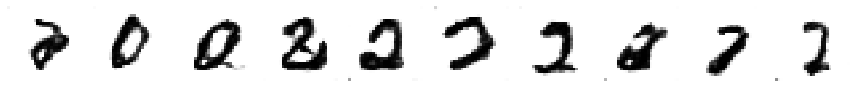

  5%|▌         | 1/20 [02:57<56:12, 177.47s/it]

Eopch: 2


 10%|█         | 2/20 [05:48<52:41, 175.62s/it]

Eopch: 3


 15%|█▌        | 3/20 [08:40<49:25, 174.44s/it]

Eopch: 4


 20%|██        | 4/20 [11:34<46:29, 174.34s/it]

Eopch: 5


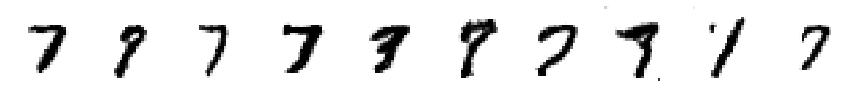

 25%|██▌       | 5/20 [14:29<43:38, 174.58s/it]

Eopch: 6


 30%|███       | 6/20 [17:23<40:39, 174.24s/it]

Eopch: 7


 35%|███▌      | 7/20 [20:17<37:43, 174.15s/it]

Eopch: 8


 40%|████      | 8/20 [23:11<34:48, 174.08s/it]

Eopch: 9


 45%|████▌     | 9/20 [26:03<31:49, 173.60s/it]

Eopch: 10


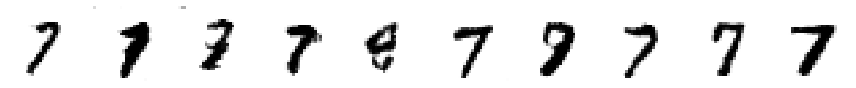

 50%|█████     | 10/20 [28:55<28:52, 173.25s/it]

Eopch: 11


 55%|█████▌    | 11/20 [31:48<25:57, 173.03s/it]

Eopch: 12


 60%|██████    | 12/20 [34:40<23:02, 172.84s/it]

Eopch: 13


 65%|██████▌   | 13/20 [37:30<20:03, 171.94s/it]

Eopch: 14


 70%|███████   | 14/20 [40:20<17:07, 171.22s/it]

Eopch: 15


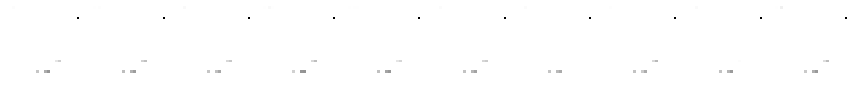

 75%|███████▌  | 15/20 [43:12<14:17, 171.47s/it]

Eopch: 16


 80%|████████  | 16/20 [46:06<11:29, 172.37s/it]

Eopch: 17


 85%|████████▌ | 17/20 [49:00<08:38, 172.84s/it]

Eopch: 18


 90%|█████████ | 18/20 [51:53<05:45, 172.74s/it]

Eopch: 19


 95%|█████████▌| 19/20 [54:43<02:52, 172.17s/it]

Eopch: 20


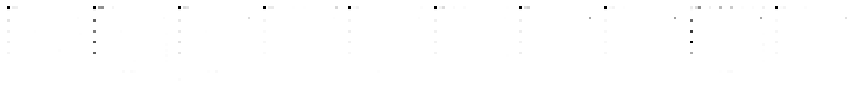

100%|██████████| 20/20 [57:34<00:00, 172.75s/it]


In [24]:
fit(X, epochs=20)

In [25]:
!pip install imageai

     |████████████████████████████████| 184kB 6.3MB/s 


In [26]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
!wget https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5

In [ ]:
from imageai.Detection import VideoObjectDetection
import os

execution_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "yolo.h5"))
detector.loadModel()

In [ ]:
detector.detectCustomObjectsFromVideo(input_file_path="/content/Kathmandu_Nepal_2013.mp4", 
                                      output_file_path="out_yolo")